# Support Vector Machine

- SVM means drawing the best line (or curve) that separates different groups in your data
- it finds the line (or hyperplane) that gives the maximum margin, meaning its as far away as possible from both groups
- works for classification (predict categories) and regression
- simple example: imagine seperating red and blue balls on a table `SVM` finds the straightest divider between them  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["species"] = data.target

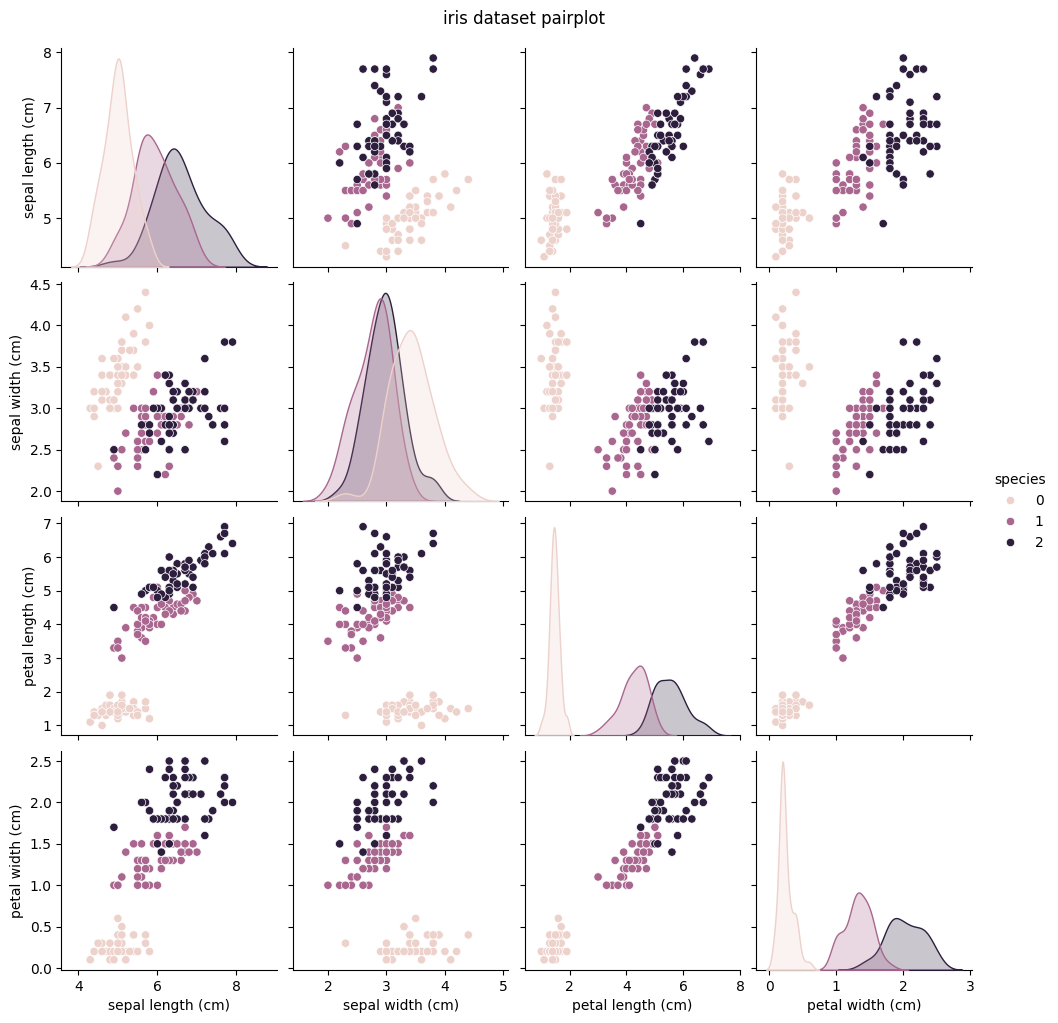

In [7]:
sns.pairplot(df, hue = "species", diag_kind = "kde")
plt.suptitle("iris dataset pairplot", y = 1.02)
plt.show()

In [12]:
X = df.drop("species", axis = 1)
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
model = SVC(kernel = "linear")
model.fit(X_train, y_train)
#### linear is used for straight line, rbf is used for curved separation, poly is used for polynomial boundaries

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
y_pred = model.predict(X_test)

In [16]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [17]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [19]:
import numpy as np

In [27]:
X_2d = df[["petal length (cm)", "petal width (cm)"]]
y_2d = df["species"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2d, y_2d, test_size = 0.2, random_state = 42)

In [33]:
model2 = SVC(kernel = "linear", decision_function_shape = "ovr")
model2.fit(X_train2, y_train2)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
y_pred2 = model.predict(X_test2)

In [35]:
print(accuracy_score(y_test2, y_pred2))

1.0


In [36]:
print(confusion_matrix(y_test2, y_pred2))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [37]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [44]:
x_min, x_max = X_2d["petal length (cm)"].min() - 1, X_2d["petal length (cm)"].max() + 1
y_min, y_max = X_2d["petal width (cm)"].min() - 1, X_2d["petal width (cm)"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\Smita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


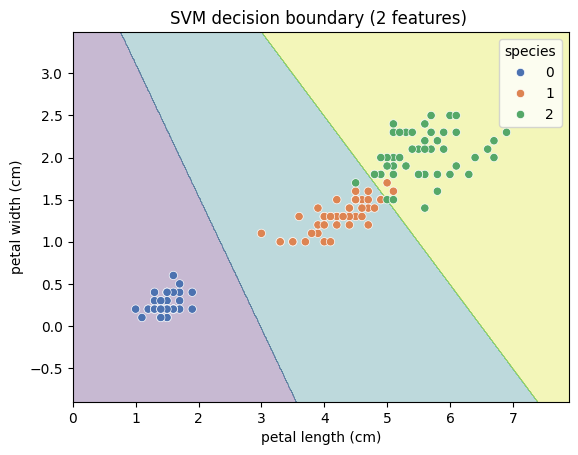

In [46]:
plt.contourf(xx, yy, Z, alpha = 0.3)
sns.scatterplot(x = "petal length (cm)", y = "petal width (cm)", hue = "species", data = df, palette = "deep")
plt.title("SVM decision boundary (2 features) ")
plt.show() 